This file contains the code to generate Figure 2.3 and 2.4. 

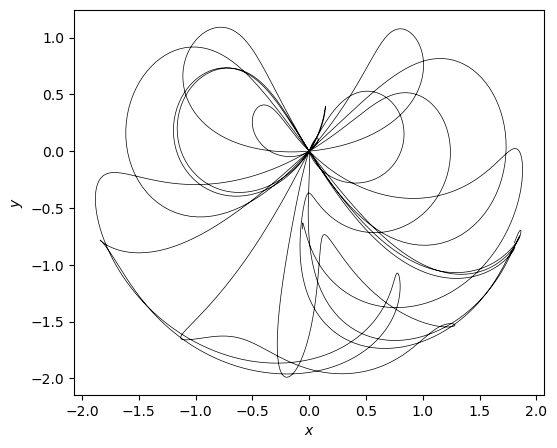

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants and initial conditions
g = 9.81  # acceleration due to gravity
L1, L2 = 1.0, 1.0  # lengths of the pendulum arms
m1, m2 = 1.0, 1.0  # masses of the pendulum bobs

# Initial angles (in radians) and angular velocities
initial = [1.3, 1, 1, .5]  # theta1, omega1, theta2, omega2

# Equations of motion for the double pendulum
def equations(t, y):
    theta1, omega1, theta2, omega2 = y
    delta = theta2 - theta1
    den1 = (m1 + m2) * L1 - m2 * L1 * np.cos(delta) * np.cos(delta)
    den2 = (L2 / L1) * den1

    domega1_dt = (m2 * g * np.sin(theta2) * np.cos(delta) -
                 m2 * np.sin(delta) * (L1 * omega1 * omega1 * np.cos(delta) + L2 * omega2 * omega2) -
                 (m1 + m2) * g * np.sin(theta1)) / den1

    domega2_dt = ((m1 + m2) * (L1 * omega1 * omega1 * np.sin(delta) - g * np.sin(theta2) + g * np.sin(theta1) * np.cos(delta)) +
                 m2 * L2 * omega2 * omega2 * np.sin(delta) * np.cos(delta)) / den2

    dtheta1_dt = omega1
    dtheta2_dt = omega2

    return [dtheta1_dt, domega1_dt, dtheta2_dt, domega2_dt]

# Time span and time steps
t_span = (0, 25)
t_eval = np.linspace(t_span[0], t_span[1], 2000)

# Solve the ODE
solution = solve_ivp(equations, t_span, initial, t_eval=t_eval, method='RK45')

# Extract angles from the solution
theta1 = solution.y[0]
theta2 = solution.y[2]

# Convert angles to Cartesian coordinates for plotting
x1 = L1 * np.sin(theta1)
y1 = -L1 * np.cos(theta1)
x2 = x1 + L2 * np.sin(theta2)
y2 = y1 - L2 * np.cos(theta2)

# Plotting
plt.figure(figsize=(10, 5))
#plt.plot(x1, y1, label='Trajectory of Bob 1')
plt.plot(x2, y2,'black',linewidth=0.5)
#plt.title('Trajectory of a Double Pendulum')
#plt.xlabel('X Position')
#plt.ylabel('Y Position')
#plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.gca().set_aspect('equal')

plt.grid(False)
plt.show()


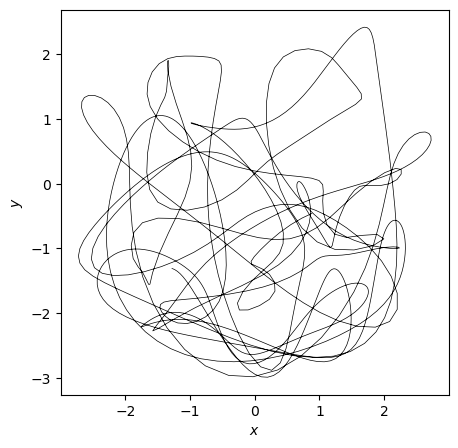

In [3]:
# Constants
g = 9.81  # Gravity
L1, L2, L3 = 1.0, 1.0, 1.0  # Length of the pendulum arms
m1, m2, m3 = 1.0, 1.0, 1.0  # Masses of pendulum bobs

# Initial conditions: [theta1, omega1, theta2, omega2, theta3, omega3]
initial = [-np.pi/3, 1, np.pi/5, 2, -np.pi/2, 1]

# Time span for the simulation
t_span = [0, 20]
t_eval = np.linspace(*t_span, 1000)

# Dynamics of the triple pendulum
def triple_pendulum(t, y):
    theta1, omega1, theta2, omega2, theta3, omega3 = y

    # Mass and length products
    M1 = m1 + m2 + m3
    M2 = m2 + m3
    M3 = m3

    # Equations derived from Lagrange's equations, simplified for brevity
    a1 = (M1 * L1)
    a2 = (M2 * L2)
    a3 = (M3 * L3)

    f1 = -M1 * g * np.sin(theta1) - np.sin(theta1 - theta2) * m2 * L2 * omega2**2 - np.sin(theta1 - theta3) * m3 * L3 * omega3**2
    f2 = -M2 * g * np.sin(theta2) + np.sin(theta1 - theta2) * M2 * L1 * omega1**2 - np.sin(theta2 - theta3) * m3 * L3 * omega3**2
    f3 = -M3 * g * np.sin(theta3) + np.sin(theta2 - theta3) * M3 * L2 * omega2**2 + np.sin(theta1 - theta3) * M3 * L1 * omega1**2

    # Solving the equations for angular acceleration
    domega1_dt = f1 / a1
    domega2_dt = f2 / a2
    domega3_dt = f3 / a3

    return [omega1, domega1_dt, omega2, domega2_dt, omega3, domega3_dt]

# Numerically solve the differential equations
solution = solve_ivp(triple_pendulum, t_span, initial, t_eval=t_eval, method='RK45')

# Extract angles
theta1 = solution.y[0]
theta2 = solution.y[2]
theta3 = solution.y[4]

# Calculate cartesian coordinates for plotting
x1 = L1 * np.sin(theta1)
y1 = -L1 * np.cos(theta1)
x2 = x1 + L2 * np.sin(theta2)
y2 = y1 - L2 * np.cos(theta2)
x3 = x2 + L3 * np.sin(theta3)
y3 = y2 - L3 * np.cos(theta3)

plt.figure(figsize=(10, 5))
plt.plot(x3, y3,'black',linewidth=0.5)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.gca().set_aspect('equal')

plt.grid(False)
plt.show()
